Comme on se retrouve... Suite et fin de l'aventure dans ce notebook.
# Sommaire
* [I) Importation des données](#i)
* [II) Préparation des données](#ii)
* [III) ACP](#iii)
* [IV) Clustering](#iv)
    * [1) Classification hiérarchique](#iv1)
    * [2) K-means](#iv2)
* [V) Analyse](#v)
* [VI) Stabilité politique](#vi)
* [Conclusion](#conclusion)

# I) Importation des données <a class="anchor" id="i"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.express as px
import datetime as dt
import scipy.stats as st
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data_final = pd.read_csv('data_final.csv')
data_final

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population
0,Afghanistan,57.0,0.0,29.0,55.0,28.0,0.0,0.0,1.53,36296113
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,0.0,0.0,35.69,57009756
2,Albanie,47.0,0.0,38.0,47.0,13.0,0.0,4.0,16.36,2884169
3,Algérie,277.0,0.0,2.0,264.0,275.0,0.0,0.0,6.38,41389189
4,Allemagne,1739.0,646.0,842.0,1609.0,1514.0,-38.0,-29.0,19.47,82658409
...,...,...,...,...,...,...,...,...,...,...
162,Égypte,1250.0,1.0,110.0,1250.0,1118.0,-1.0,-23.0,12.96,96442591
163,Émirats arabes unis,412.0,94.0,433.0,412.0,48.0,0.0,-26.0,43.47,9487203
164,Équateur,341.0,0.0,0.0,324.0,340.0,0.0,-1.0,19.31,16785361
165,Éthiopie,14.0,0.0,1.0,14.0,14.0,0.0,0.0,0.13,106399924


In [3]:
data_final.set_index('Zone', inplace=True)
data_final

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population
Zone,,,,,,,,,
Afghanistan,57.0,0.0,29.0,55.0,28.0,0.0,0.0,1.53,36296113
Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,0.0,0.0,35.69,57009756
Albanie,47.0,0.0,38.0,47.0,13.0,0.0,4.0,16.36,2884169
Algérie,277.0,0.0,2.0,264.0,275.0,0.0,0.0,6.38,41389189
Allemagne,1739.0,646.0,842.0,1609.0,1514.0,-38.0,-29.0,19.47,82658409
...,...,...,...,...,...,...,...,...,...
Égypte,1250.0,1.0,110.0,1250.0,1118.0,-1.0,-23.0,12.96,96442591
Émirats arabes unis,412.0,94.0,433.0,412.0,48.0,0.0,-26.0,43.47,9487203
Équateur,341.0,0.0,0.0,324.0,340.0,0.0,-1.0,19.31,16785361


# II) Préparation des données <a class="anchor" id="ii"></a>

In [4]:
#Soit X la matrice des données
X = data_final.values
X[:5]

array([[ 5.7000000e+01,  0.0000000e+00,  2.9000000e+01,  5.5000000e+01,
         2.8000000e+01,  0.0000000e+00,  0.0000000e+00,  1.5300000e+00,
         3.6296113e+07],
       [ 2.1180000e+03,  6.3000000e+01,  5.1400000e+02,  2.0350000e+03,
         1.6670000e+03,  0.0000000e+00,  0.0000000e+00,  3.5690000e+01,
         5.7009756e+07],
       [ 4.7000000e+01,  0.0000000e+00,  3.8000000e+01,  4.7000000e+01,
         1.3000000e+01,  0.0000000e+00,  4.0000000e+00,  1.6360000e+01,
         2.8841690e+06],
       [ 2.7700000e+02,  0.0000000e+00,  2.0000000e+00,  2.6400000e+02,
         2.7500000e+02,  0.0000000e+00,  0.0000000e+00,  6.3800000e+00,
         4.1389189e+07],
       [ 1.7390000e+03,  6.4600000e+02,  8.4200000e+02,  1.6090000e+03,
         1.5140000e+03, -3.8000000e+01, -2.9000000e+01,  1.9470000e+01,
         8.2658409e+07]])

In [5]:
#On vérifie que c'est un array
type(X)

numpy.ndarray

In [6]:
#On vérifie qu'elle est conforme à nos attentes
X.shape

(167, 9)

In [7]:
#On enregistre nos pays et colonnes dans deux nouvelles variables
pays = data_final.index
pays[:5]

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne'], dtype='object', name='Zone')

In [8]:
éléments = data_final.columns
éléments

Index(['Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production', 'Résidus',
       'Variation de stock',
       'Disponibilité alimentaire en quantité (kg/personne/an)', 'Population'],
      dtype='object')

# III) ACP <a class="anchor" id="iii"></a>

In [9]:
#On instancie
scaler = StandardScaler()

In [10]:
#On centre et réduit
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.2923786 , -0.32237603, -0.32734709, -0.28755779, -0.3004323 ,
         0.20746251, -0.18826626, -1.19679658,  0.03145727],
       [ 1.0411612 ,  0.01932437,  2.25908132,  1.04291905,  0.76068346,
         0.20746251, -0.18826626,  1.00389044,  0.21186243],
       [-0.29884896, -0.32237603, -0.27935151, -0.29293345, -0.31014355,
         0.20746251, -0.13472779, -0.24140465, -0.25954356],
       [-0.15003083, -0.32237603, -0.47133383, -0.14711857, -0.14052041,
         0.20746251, -0.18826626, -0.88434541,  0.07581533],
       [ 0.79593481,  3.18140907,  4.00825352,  0.75666495,  0.66162872,
        -2.6238431 , -0.57642016, -0.04104936,  0.43524899]])

In [11]:
#On vérifie que moyenne = 0 et écart type = 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
#On entraine notre PCA
pca = PCA(n_components=9)
pca.fit(X_scaled)

PCA(n_components=9)

In [13]:
#On calcule la variance cumulée
pca.explained_variance_ratio_.cumsum()

array([0.47133809, 0.68459496, 0.80798899, 0.91531227, 0.97117627,
       0.99341017, 0.99972735, 0.99999999, 1.        ])

Environ 92% de la variance est comprise dans les 4 premières composantes.

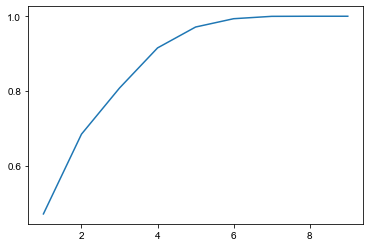

In [14]:
#Un peu de visualisation
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum())
sns.set(font_scale=2)
plt.show()

In [15]:
#Intéressons-nous aux composantes maintenant
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8
0,0.472508,0.235798,0.245677,0.472911,0.473564,-0.104002,0.050463,3.642635e-02,0.445175
1,-0.151449,0.526017,0.393007,-0.147027,-0.129321,-0.622191,0.148096,2.225338e-01,-0.221356
2,0.013338,-0.265185,0.322026,0.013069,-0.018321,0.298830,0.808195,2.733467e-01,-0.089972
3,-0.055230,0.121578,0.056149,-0.056078,-0.029836,-0.090406,0.367153,-9.097348e-01,0.066247
4,-0.016563,0.306575,-0.806820,-0.017400,0.138461,-0.134019,0.423554,1.786263e-01,0.077706
5,0.024515,-0.679720,-0.084396,0.027994,-0.042413,-0.685657,0.080833,1.927772e-02,0.225041
6,0.298612,-0.131984,-0.101711,0.285125,0.295097,-0.128435,-0.009413,-1.205408e-01,-0.826785
7,0.409589,-0.046599,0.051527,-0.817949,0.397372,-0.002704,-0.019233,2.639339e-03,0.009039
8,0.701971,0.083678,-0.085167,-0.000122,-0.701307,-0.000026,0.033911,1.954759e-07,-0.000083


In [16]:
#Un peu plus de clarté
pcs.columns = éléments
pcs.index = [f"F{i}" for i in range (1,10)]
pcs = pcs.round(2)
pcs

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population
F1,0.47,0.24,0.25,0.47,0.47,-0.10,0.05,0.04,0.45
F2,-0.15,0.53,0.39,-0.15,-0.13,-0.62,0.15,0.22,-0.22
F3,0.01,-0.27,0.32,0.01,-0.02,0.30,0.81,0.27,-0.09
F4,-0.06,0.12,0.06,-0.06,-0.03,-0.09,0.37,-0.91,0.07
F5,-0.02,0.31,-0.81,-0.02,0.14,-0.13,0.42,0.18,0.08
F6,0.02,-0.68,-0.08,0.03,-0.04,-0.69,0.08,0.02,0.23
F7,0.30,-0.13,-0.10,0.29,0.30,-0.13,-0.01,-0.12,-0.83
F8,0.41,-0.05,0.05,-0.82,0.40,-0.00,-0.02,0.00,0.01
F9,0.70,0.08,-0.09,-0.00,-0.70,-0.00,0.03,0.00,-0.00


In [17]:
#Cercle de corrélation
def correlation_graph(pca, 
                      x_y, 
                      éléments) : 
    #pca : notre objet PCA qui a été fit
    #x_y : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    #éléments : dimensions à représenter

    #Extrait x et y 
    x,y=x_y

    #Taille de l'image
    fig, ax = plt.subplots(figsize=(20, 12))

    #Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        #Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        #Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                éléments[i])
        
    #Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    #Le titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    #Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    #Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    plt.axis('equal')
    plt.show()

In [18]:
x_y = (0,1)
x_y

(0, 1)

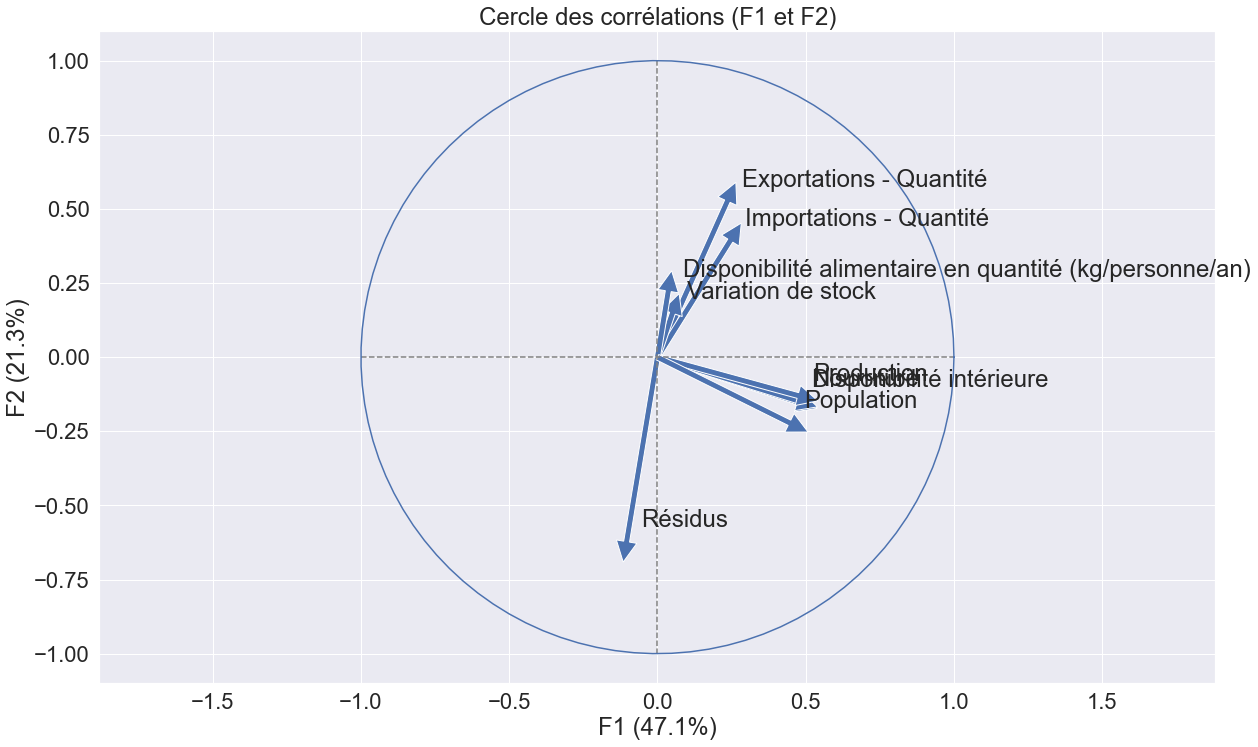

In [19]:
correlation_graph(pca, x_y, éléments)

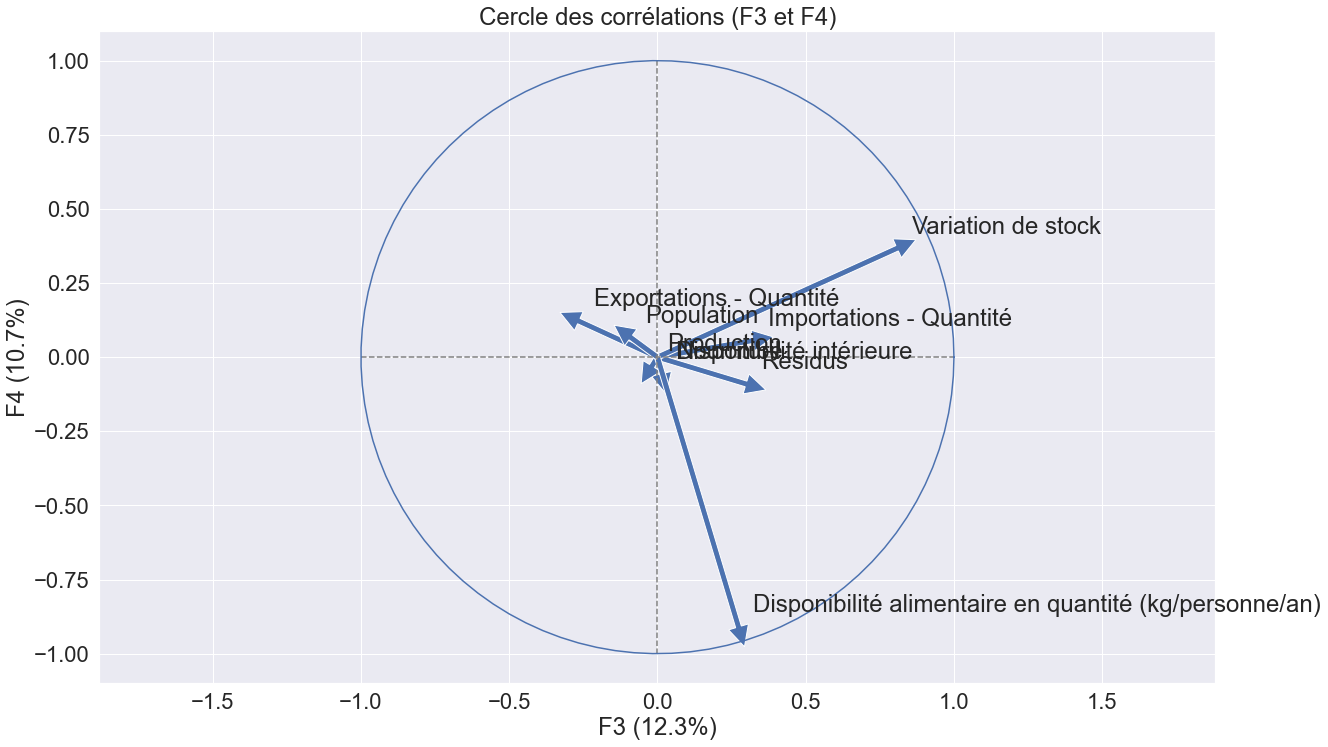

In [20]:
correlation_graph(pca, (2,3), éléments)

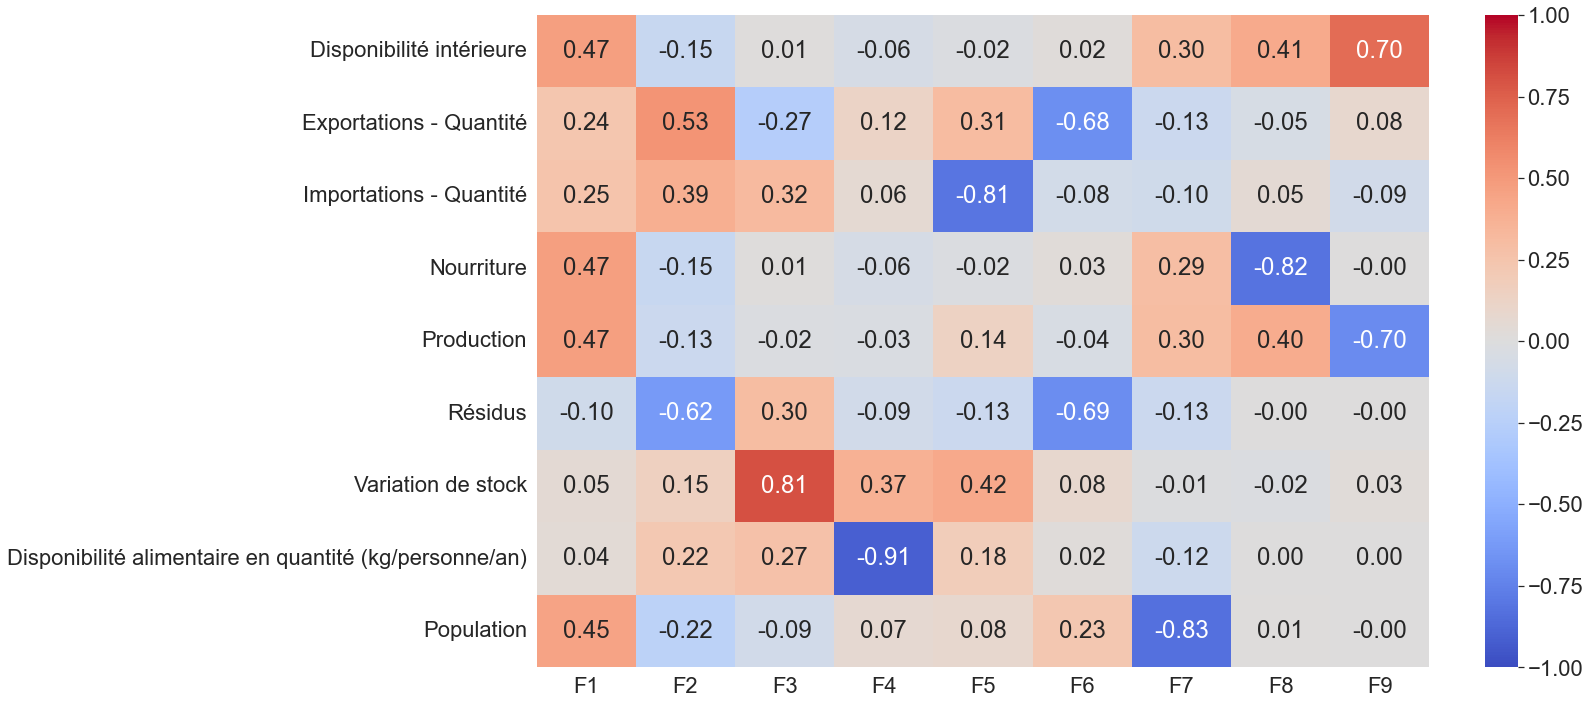

In [21]:
#On transpose et on met ça en couleur
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [22]:
#Il faut désormais calculer les coordonnées des individus dans le nouvel espace projectif
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-6.33519592e-01, -6.03067406e-01, -4.42209173e-01,
         9.86636336e-01, -1.85354165e-01,  7.08183247e-02,
        -8.87298628e-02, -5.59033768e-03, -1.83646788e-07],
       [ 2.00476408e+00,  5.08147824e-01,  9.01127335e-01,
        -9.96605656e-01, -1.65857459e+00, -2.71770784e-01,
         2.79369876e-01, -1.20369332e-03,  7.59252538e-05],
       [-7.23969859e-01, -2.96227926e-01, -9.61274144e-02,
         1.21505476e-01, -5.44996936e-02,  2.41288647e-02,
         2.49852949e-02, -6.36796933e-03,  2.13946708e-05],
       [-4.28361078e-01, -6.62829940e-01, -4.06355603e-01,
         6.76733860e-01,  7.41641692e-03,  9.96148250e-02,
        -1.86835741e-02, -4.80755201e-03,  1.86956792e-05],
       [ 3.21821469e+00,  4.37307725e+00, -8.44842667e-01,
         5.97472579e-01, -2.05934943e+00, -6.38496060e-01,
        -1.91405049e-01,  5.02981598e-02, -4.52562471e-05]])

In [23]:
#Pour plus de clarté
X_proj = pd.DataFrame(X_proj, columns = [f"F{i}" for i in range (1,10)])
X_proj.index = pays
X_proj

,F1,F2,F3,F4,F5,F6,F7,F8,F9
Zone,,,,,,,,,
Afghanistan,-0.633520,-0.603067,-0.442209,0.986636,-0.185354,0.070818,-0.088730,-0.005590,-1.836468e-07
Afrique du Sud,2.004764,0.508148,0.901127,-0.996606,-1.658575,-0.271771,0.279370,-0.001204,7.592525e-05
Albanie,-0.723970,-0.296228,-0.096127,0.121505,-0.054500,0.024129,0.024985,-0.006368,2.139467e-05
Algérie,-0.428361,-0.662830,-0.406356,0.676734,0.007416,0.099615,-0.018684,-0.004808,1.869568e-05
Allemagne,3.218215,4.373077,-0.844843,0.597473,-2.059349,-0.638496,-0.191405,0.050298,-4.525625e-05
...,...,...,...,...,...,...,...,...,...
Égypte,0.804786,-0.708002,-0.413600,0.161358,-0.409419,0.200433,0.024919,-0.031003,4.569529e-05
Émirats arabes unis,0.221029,1.041517,0.600655,-1.458179,-1.456415,-0.474349,-0.363709,-0.003611,-4.774767e-04
Équateur,-0.438147,-0.453843,-0.173325,-0.106577,0.146934,0.067627,0.095567,-0.004132,4.266862e-05


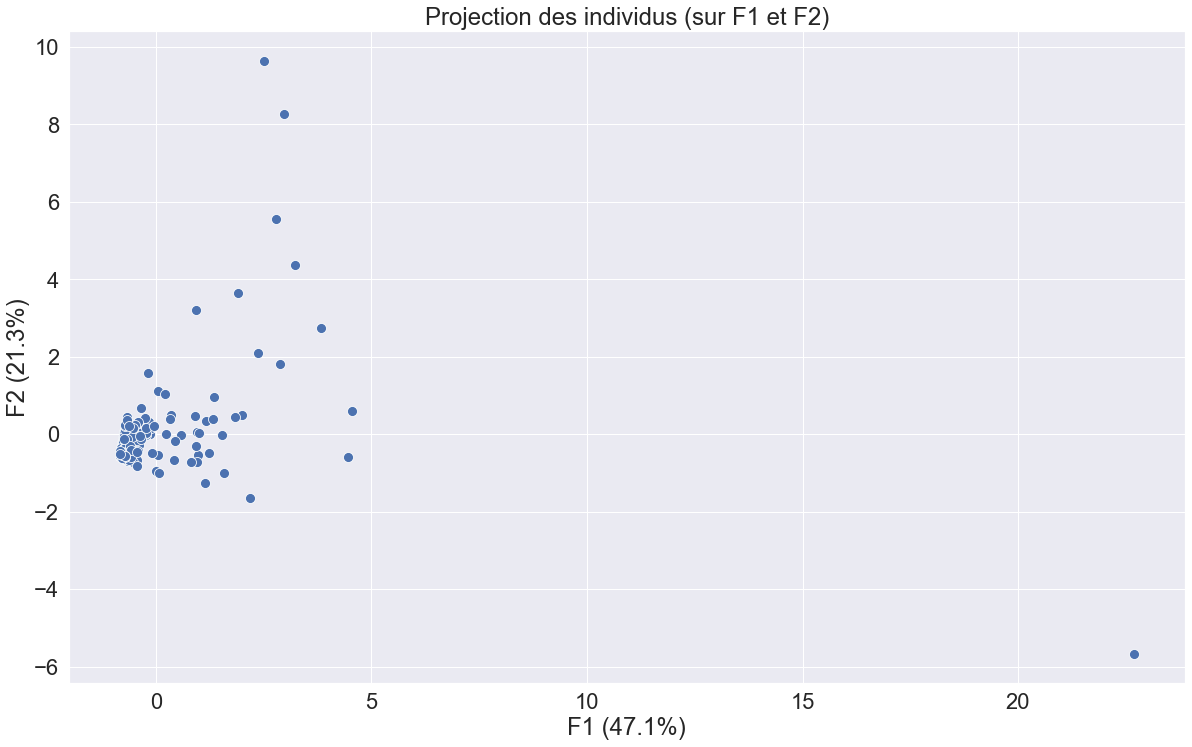

In [24]:
plt.figure(figsize=(20,12))
x, y = (0, 1)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, 0], y=X_proj.iloc[:, 1], s=100)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.show()

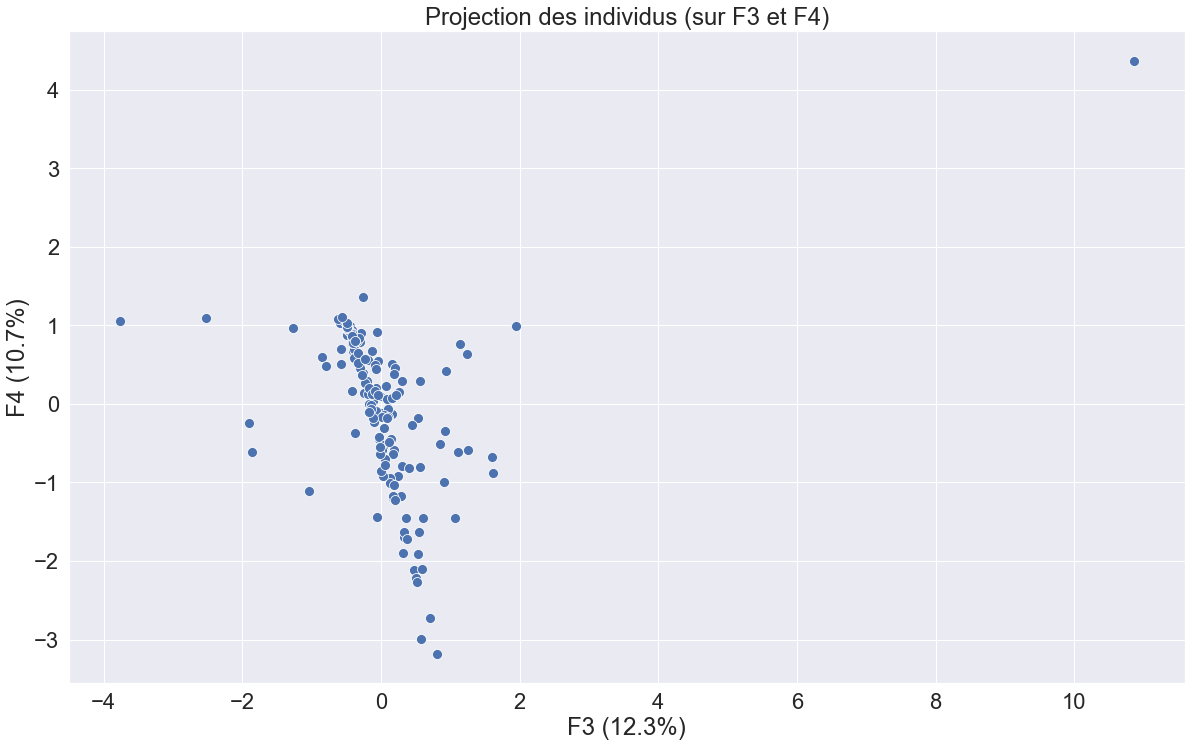

In [25]:
plt.figure(figsize=(20,12))
x, y = (2, 3)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, 2], y=X_proj.iloc[:, 3], s=100)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.show()

Difficile de déterminer des clusters bien distincts à l'oeil nu.
# IV) Clustering <a class="anchor" id="iv"></a>
On va utiliser 2 méthodes différentes, la classification hiérarchique et le k-means, puis on comparera les résultats.
## 1) Classification hiérarchique <a class="anchor" id="iv1"></a>

In [26]:
#Soit Z la matrice de distance
Z = linkage(X_proj, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,110.0,138.0,0.012621,2.0
1,27.0,87.0,0.020901,2.0
2,143.0,161.0,0.034641,2.0
3,108.0,127.0,0.034832,2.0
4,60.0,94.0,0.037378,2.0
...,...,...,...,...
161,306.0,326.0,12.152496,152.0
162,321.0,328.0,13.696172,158.0
163,73.0,327.0,17.177742,8.0
164,329.0,330.0,23.626926,166.0


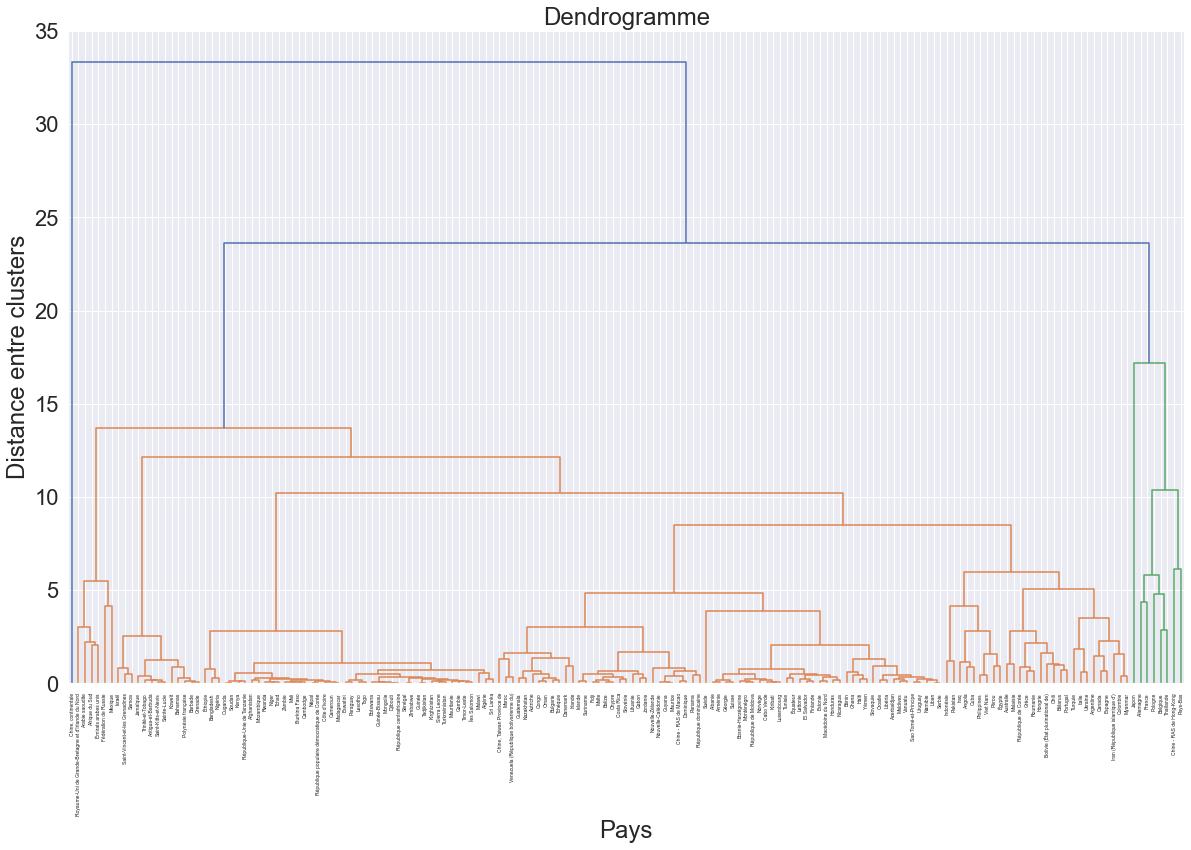

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

D = dendrogram(Z, labels=pays, ax=ax)

plt.title("Dendrogramme")
plt.xlabel("Pays")
plt.ylabel("Distance entre clusters")
plt.show()

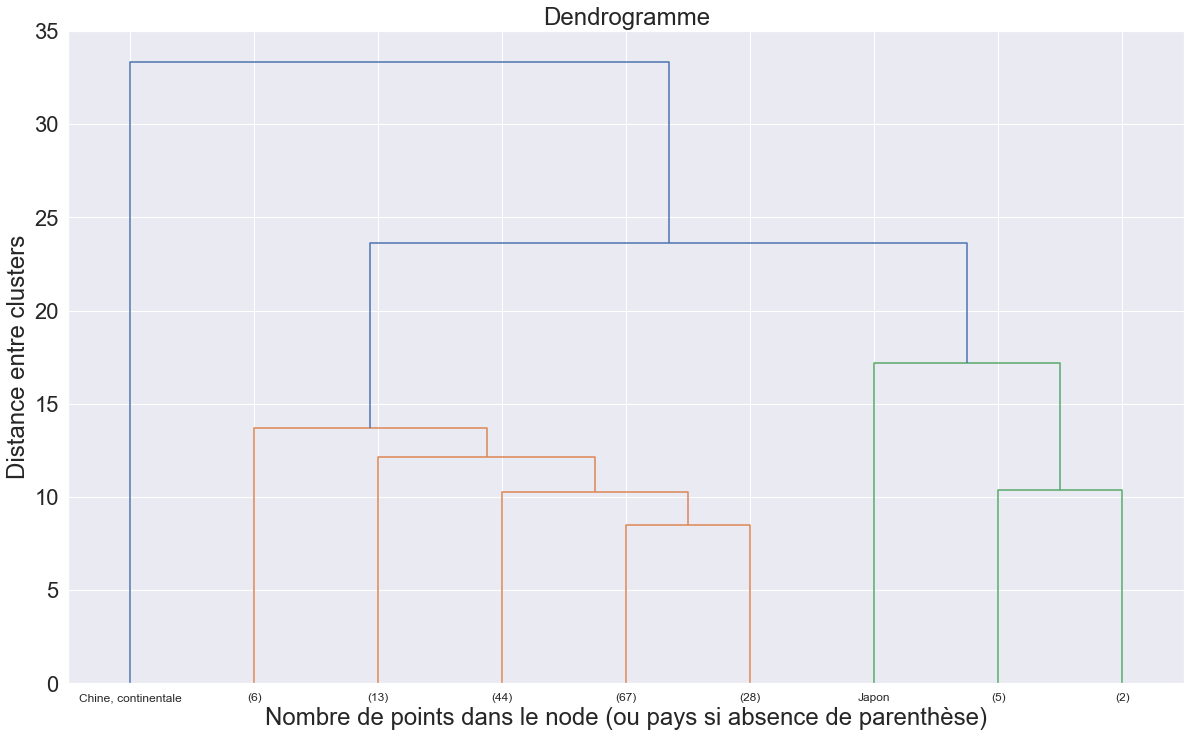

In [28]:
#C'est assez illisible, on va couper sur l'axe des y à une distance de 8, ce qui donne 9 clusters

fig, ax = plt.subplots(1, 1, figsize=(20, 12))

D = dendrogram(Z, labels=pays, p=9, truncate_mode="lastp", ax=ax)

plt.title("Dendrogramme")
plt.xlabel("Nombre de points dans le node (ou pays si absence de parenthèse)")
plt.ylabel("Distance entre clusters")
plt.show()

In [29]:
#On définit les clusters (c'est d pour dendrogramme)
k=9
clusters_d = fcluster(Z, k, criterion='maxclust')
clusters_d

array([3, 1, 4, 3, 6, 5, 2, 1, 5, 4, 5, 4, 4, 2, 3, 2, 6, 4, 5, 4, 3, 4,
       3, 5, 4, 4, 3, 3, 5, 5, 7, 4, 4, 9, 4, 5, 4, 4, 4, 5, 3, 4, 3, 4,
       4, 5, 4, 3, 4, 4, 6, 1, 4, 3, 4, 2, 5, 4, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 4, 4, 2, 5, 2, 8, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 4, 4, 4, 3,
       5, 3, 4, 3, 4, 4, 4, 3, 1, 3, 4, 3, 5, 4, 4, 3, 3, 4, 4, 4, 3, 4,
       3, 5, 4, 3, 7, 5, 6, 2, 5, 5, 5, 1, 3, 3, 5, 4, 4, 3, 3, 2, 2, 2,
       2, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 6, 3, 3, 2, 4, 3, 5,
       5, 4, 4, 4, 5, 4, 3, 3, 5, 1, 4, 3, 3], dtype=int32)

In [30]:
#On créé une copie pour tout à l'heure avec le k-means
X_proj_d = X_proj.copy()
X_proj_d['clusters_d'] = clusters_d
X_proj_d

,F1,F2,F3,F4,F5,F6,F7,F8,F9,clusters_d
Zone,,,,,,,,,,
Afghanistan,-0.633520,-0.603067,-0.442209,0.986636,-0.185354,0.070818,-0.088730,-0.005590,-1.836468e-07,3
Afrique du Sud,2.004764,0.508148,0.901127,-0.996606,-1.658575,-0.271771,0.279370,-0.001204,7.592525e-05,1
Albanie,-0.723970,-0.296228,-0.096127,0.121505,-0.054500,0.024129,0.024985,-0.006368,2.139467e-05,4
Algérie,-0.428361,-0.662830,-0.406356,0.676734,0.007416,0.099615,-0.018684,-0.004808,1.869568e-05,3
Allemagne,3.218215,4.373077,-0.844843,0.597473,-2.059349,-0.638496,-0.191405,0.050298,-4.525625e-05,6
...,...,...,...,...,...,...,...,...,...,...
Égypte,0.804786,-0.708002,-0.413600,0.161358,-0.409419,0.200433,0.024919,-0.031003,4.569529e-05,5
Émirats arabes unis,0.221029,1.041517,0.600655,-1.458179,-1.456415,-0.474349,-0.363709,-0.003611,-4.774767e-04,1
Équateur,-0.438147,-0.453843,-0.173325,-0.106577,0.146934,0.067627,0.095567,-0.004132,4.266862e-05,4


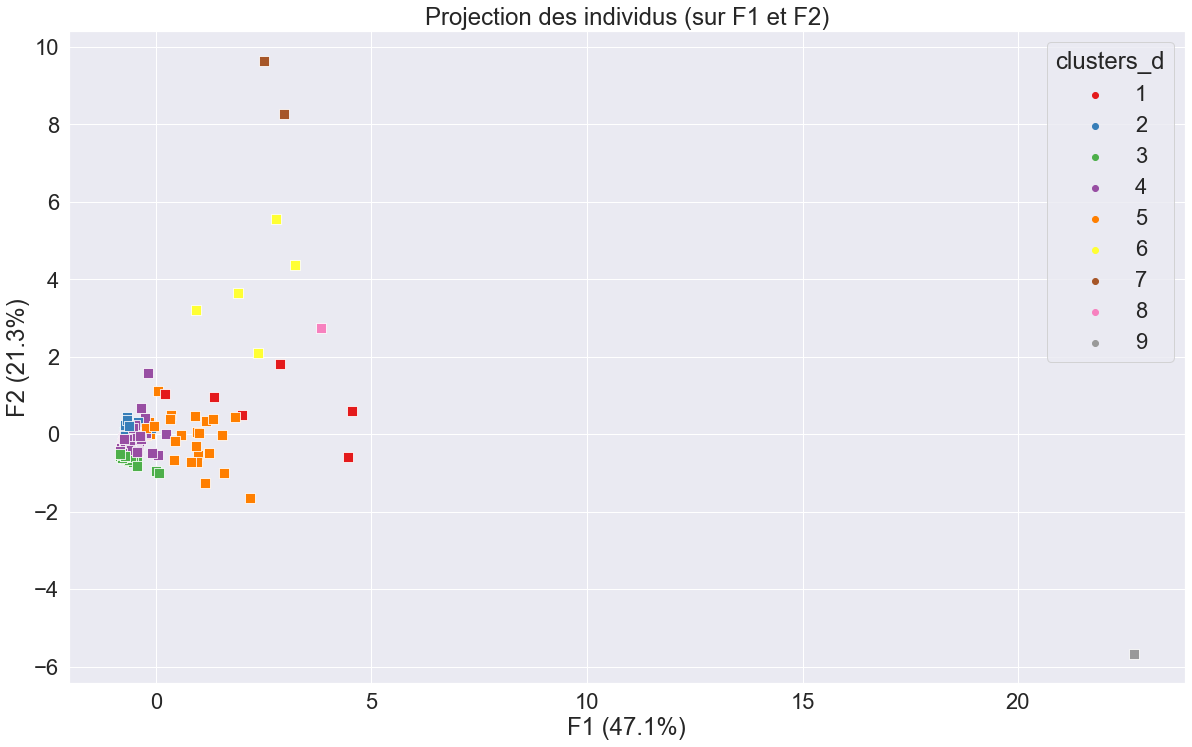

In [31]:
#On visualise
plt.figure(figsize=(20,12))
x, y = (0, 1)
sns.scatterplot(data=X_proj_d, x=X_proj_d.iloc[:, 0], y=X_proj_d.iloc[:, 1], hue='clusters_d', palette='Set1', marker='s', s=100)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.show()

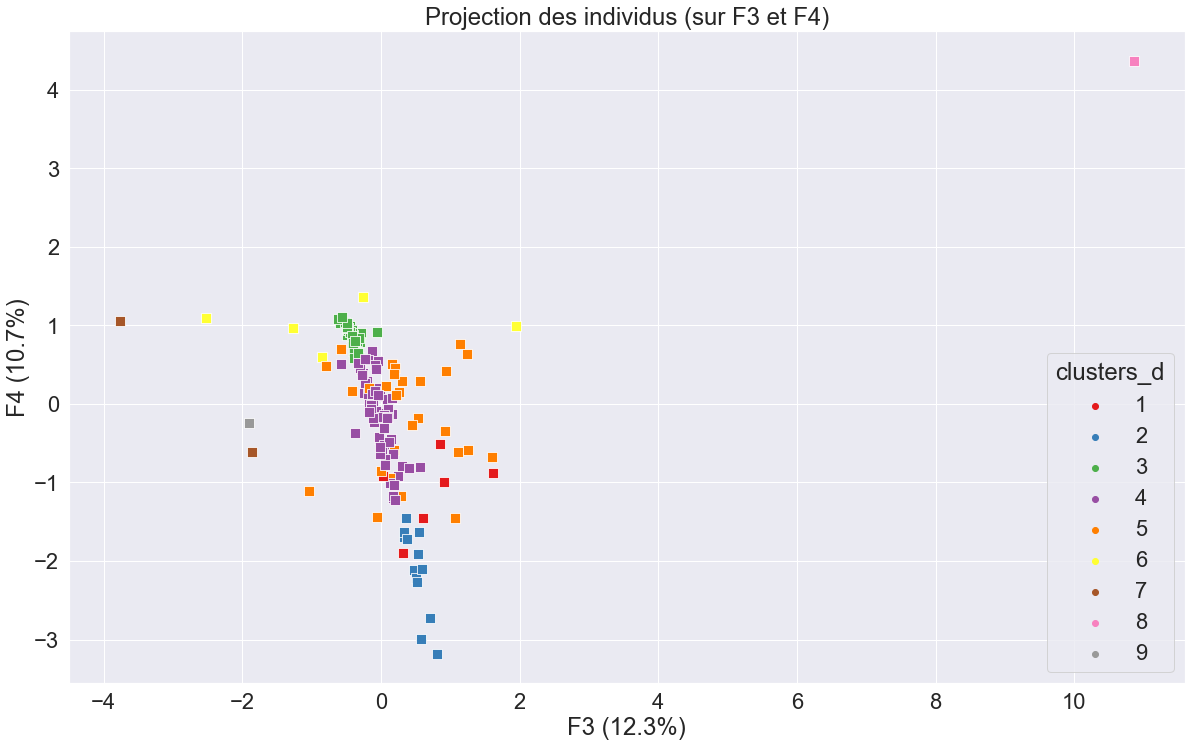

In [32]:
plt.figure(figsize=(20,12))
x, y = (2, 3)
sns.scatterplot(data=X_proj_d, x=X_proj_d.iloc[:, 2], y=X_proj_d.iloc[:, 3], hue='clusters_d', palette='Set1', marker='s', s=100)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.legend(title='clusters_d', loc='lower right')
plt.show()

In [33]:
#On affiche les pays par cluster
for i in range(1, 10) : 
    #Sélection du cluster
    sub_d = X_proj_d.loc[X_proj_d.clusters_d == i]

    #On affiche
    print(f"Cluster : {i}")

    #Liste des pays qu'on transforme en str
    liste_pays_d = sub_d.index.values
    txt_d = [f"{n}" for n in liste_pays_d]
    txt_d = " / ".join(txt_d)
 
    #Et hop
    print(txt_d)
    print("\n\n")

Cluster : 1
Afrique du Sud / Arabie saoudite / Fédération de Russie / Mexique / Royaume-Uni de Grande-Bretagne et d'Irlande du Nord / Émirats arabes unis



Cluster : 2
Antigua-et-Barbuda / Bahamas / Barbade / Grenade / Israël / Jamaïque / Koweït / Polynésie française / Saint-Kitts-et-Nevis / Saint-Vincent-et-les Grenadines / Sainte-Lucie / Samoa / Trinité-et-Tobago



Cluster : 3
Afghanistan / Algérie / Bangladesh / Botswana / Burkina Faso / Cambodge / Cameroun / Côte d'Ivoire / Djibouti / Eswatini / Gambie / Guinée / Guinée-Bissau / Kenya / Kirghizistan / Lesotho / Madagascar / Malawi / Mali / Mauritanie / Mongolie / Mozambique / Niger / Nigéria / Népal / Ouganda / Paraguay / Rwanda / République centrafricaine / République populaire démocratique de Corée / République-Unie de Tanzanie / Sierra Leone / Soudan / Sri Lanka / Sénégal / Tadjikistan / Tchad / Timor-Leste / Togo / Turkménistan / Zambie / Zimbabwe / Éthiopie / Îles Salomon



Cluster : 4
Albanie / Arménie / Autriche / Azerbaï

## 2) K-means <a class="anchor" id="iv2"></a>

In [34]:
#On va tester plusieurs valeurs de k pour voir laquelle est la plus adaptée, et noter l'inertie intraclasse obtenue
#Liste vide pour enregistrer les inerties
liste_inertie = []

In [35]:
#Nombre de clusters, comme on en a gardé 9 avec le dendrogramme, on va prévoir large
k_list = range(1,15)

In [36]:
#On instancie
for k in k_list :
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_proj)
    liste_inertie.append(kmeans.inertia_)

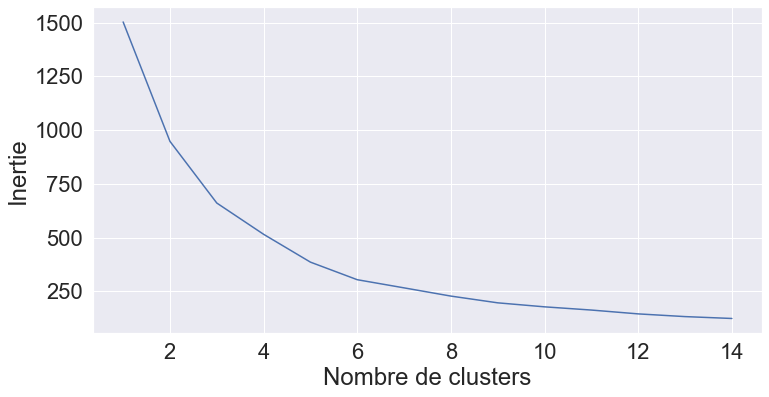

In [37]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Inertie")
ax.set_xlabel("Nombre de clusters")

ax = plt.plot(k_list, liste_inertie)

In [38]:
#Selon ce graphique, en appliquant la méthode du coude, il semblerait que 6 clusters soient plus adapté
#Sur notre dendrogramme, cela correspondrait à une coupure sur l'axe des y à une distance de 12
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_proj)

KMeans(n_clusters=6)

In [39]:
clusters_k = kmeans.labels_
clusters_k

array([1, 3, 1, 1, 3, 1, 0, 3, 0, 1, 0, 1, 1, 0, 1, 0, 4, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 3, 3, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 4, 1, 4, 0, 0, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [40]:
#On enregistre les centroïdes
centroids = kmeans.cluster_centers_
centroids

array([[-1.45845677e-01,  1.03359466e-01,  3.43121625e-01,
        -1.10423225e+00,  3.35472138e-01, -7.08152618e-02,
        -1.96285862e-02, -1.18050133e-03, -2.91429195e-05],
       [-4.90064509e-01, -4.00880642e-01, -1.95905323e-01,
         4.62881426e-01, -9.18404404e-02,  5.99394908e-02,
        -4.94983695e-04,  1.37785660e-03,  5.92086168e-06],
       [ 2.26922804e+01, -5.66450924e+00, -1.90864736e+00,
        -2.36579033e-01,  9.74375902e-01,  5.97060338e-01,
        -4.47392559e-01, -2.69739998e-02, -1.07990451e-04],
       [ 2.97591167e+00,  1.39152350e+00,  6.88055743e-01,
        -5.14549656e-01, -1.85566775e+00, -6.04254561e-01,
         2.54293123e-01, -4.96099071e-03,  1.17181032e-04],
       [ 2.21892760e+00,  6.06430913e+00, -1.93421524e+00,
         7.73671494e-01,  9.85749210e-01,  4.48710027e-03,
        -1.93199893e-02, -2.82481816e-03,  4.46610202e-05],
       [ 3.83906594e+00,  2.73351218e+00,  1.08635542e+01,
         4.37066764e+00,  6.27135897e-01,  7.157721

In [41]:
#Pour plus de clarté
centroids_proj = pca.transform(centroids)
centroids_proj = pd.DataFrame(centroids, columns=[f"F{i}" for i in range (1,10)], index=[f"cluster_{j}" for j in range (0,6)])
centroids_proj

,F1,F2,F3,F4,F5,F6,F7,F8,F9
cluster_0,-0.145846,0.103359,0.343122,-1.104232,0.335472,-0.070815,-0.019629,-0.001181,-0.000029
cluster_1,-0.490065,-0.400881,-0.195905,0.462881,-0.091840,0.059939,-0.000495,0.001378,0.000006
cluster_2,22.692280,-5.664509,-1.908647,-0.236579,0.974376,0.597060,-0.447393,-0.026974,-0.000108
cluster_3,2.975912,1.391524,0.688056,-0.514550,-1.855668,-0.604255,0.254293,-0.004961,0.000117
cluster_4,2.218928,6.064309,-1.934215,0.773671,0.985749,0.004487,-0.019320,-0.002825,0.000045
cluster_5,3.839066,2.733512,10.863554,4.370668,0.627136,0.715772,-0.241914,-0.012186,-0.000158


In [42]:
#Même manip qu'avant
X_proj_k = X_proj.copy()
X_proj_k['clusters_k'] = clusters_k
X_proj_k

,F1,F2,F3,F4,F5,F6,F7,F8,F9,clusters_k
Zone,,,,,,,,,,
Afghanistan,-0.633520,-0.603067,-0.442209,0.986636,-0.185354,0.070818,-0.088730,-0.005590,-1.836468e-07,1
Afrique du Sud,2.004764,0.508148,0.901127,-0.996606,-1.658575,-0.271771,0.279370,-0.001204,7.592525e-05,3
Albanie,-0.723970,-0.296228,-0.096127,0.121505,-0.054500,0.024129,0.024985,-0.006368,2.139467e-05,1
Algérie,-0.428361,-0.662830,-0.406356,0.676734,0.007416,0.099615,-0.018684,-0.004808,1.869568e-05,1
Allemagne,3.218215,4.373077,-0.844843,0.597473,-2.059349,-0.638496,-0.191405,0.050298,-4.525625e-05,3
...,...,...,...,...,...,...,...,...,...,...
Égypte,0.804786,-0.708002,-0.413600,0.161358,-0.409419,0.200433,0.024919,-0.031003,4.569529e-05,1
Émirats arabes unis,0.221029,1.041517,0.600655,-1.458179,-1.456415,-0.474349,-0.363709,-0.003611,-4.774767e-04,0
Équateur,-0.438147,-0.453843,-0.173325,-0.106577,0.146934,0.067627,0.095567,-0.004132,4.266862e-05,1


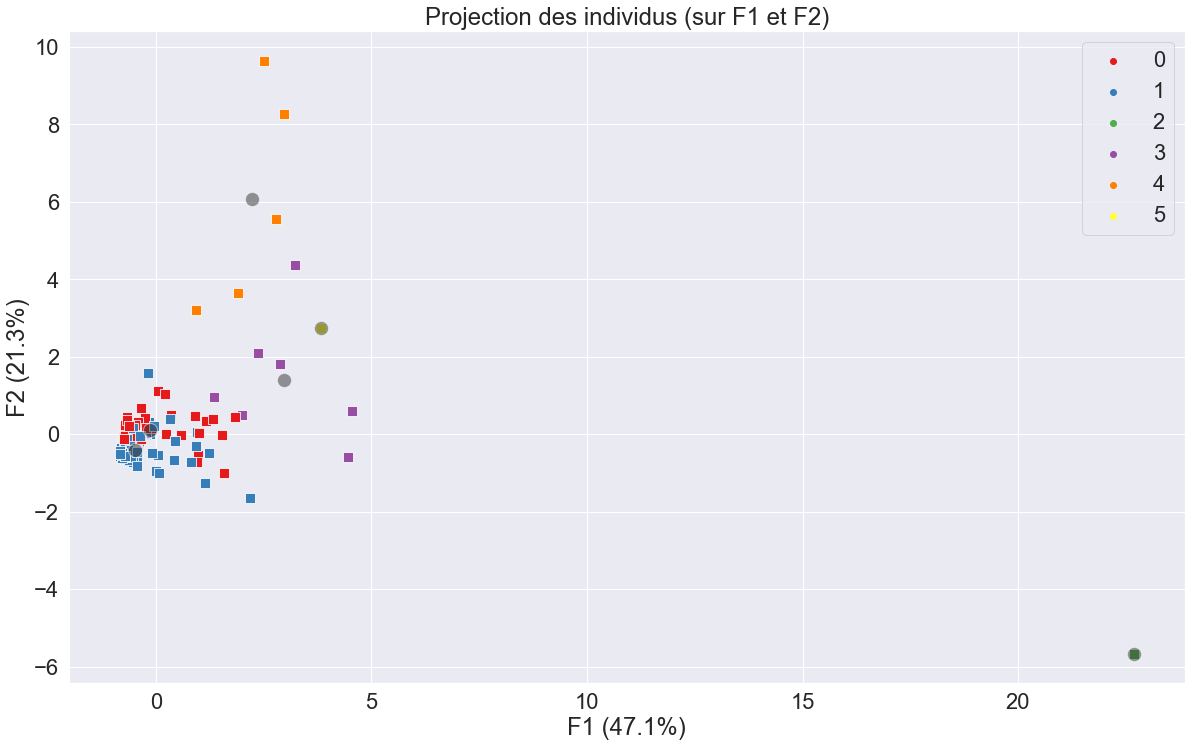

In [43]:
#On visualise
#Les centroïdes ne sont pas très foncés afin de ne pas manquer le Japon et la Chine
plt.figure(figsize=(20,12))
x, y = (0, 1)
sns.scatterplot(data=X_proj_k, x=X_proj_k.iloc[:, 0], y=X_proj_k.iloc[:, 1], hue='clusters_k', palette='Set1', marker='s', s=100)
sns.scatterplot(data=centroids_proj,x=centroids_proj.iloc[:, 0], y=centroids_proj.iloc[:, 1], marker='o', s=200, color=".2", alpha=0.5)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.show()

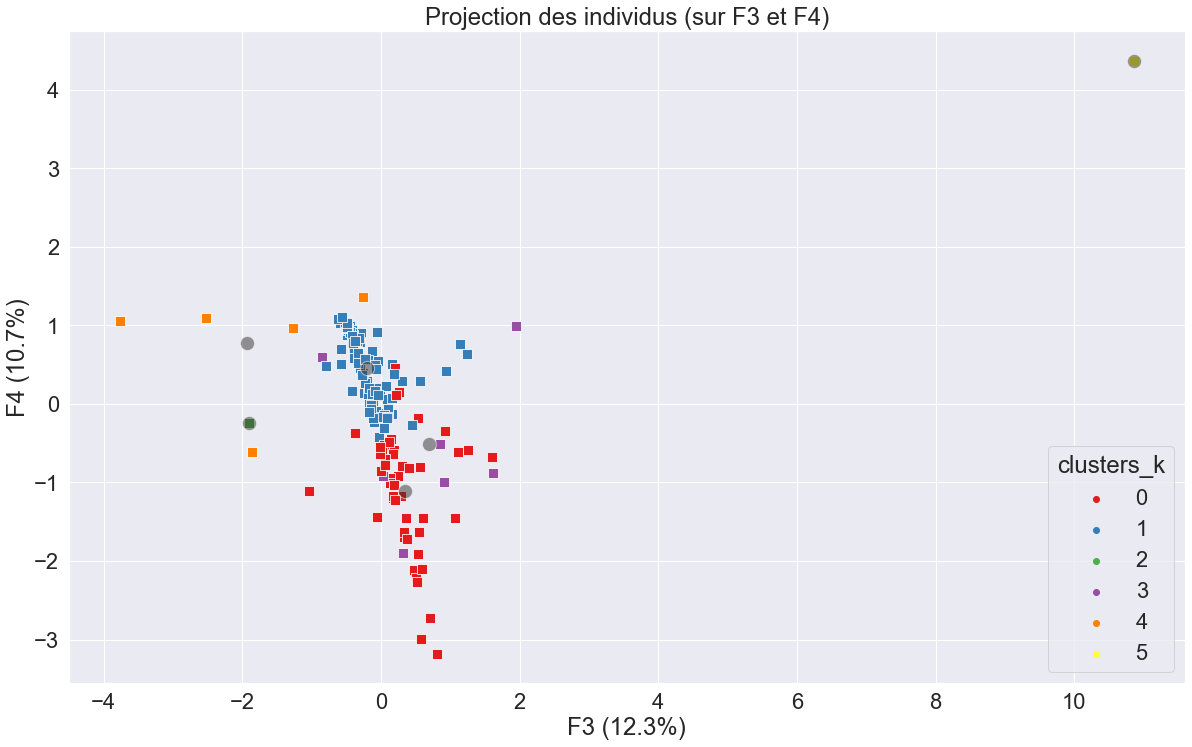

In [44]:
plt.figure(figsize=(20,12))
x, y = (2, 3)
sns.scatterplot(data=X_proj_k, x=X_proj_k.iloc[:, 2], y=X_proj_k.iloc[:, 3], hue='clusters_k', palette='Set1', marker='s', s=100)
sns.scatterplot(data=centroids_proj,x=centroids_proj.iloc[:, 2], y=centroids_proj.iloc[:, 3], marker='o', s=200, color=".2", alpha=0.5)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.legend(title='clusters_k', loc='lower right')
plt.show()

In [45]:
#Même chose qu'avant mais avec les nouveaux clusters
for i in range(0, 6) : 
    sub_k = X_proj_d.loc[X_proj_k.clusters_k == i]
    
    print(f"Cluster : {i}")

    liste_pays_k = sub_k.index.values
    txt_k = [f"{n}" for n in liste_pays_k]
    txt_k = " / ".join(txt_k)
 
    print(txt_k)
    print("\n\n")

Cluster : 0
Antigua-et-Barbuda / Argentine / Australie / Bahamas / Barbade / Bolivie (État plurinational de) / Bélarus / Canada / Chili / Chine - RAS de Macao / Chine, Taiwan Province de / Colombie / Costa Rica / Danemark / Dominique / Espagne / Fidji / Gabon / Grenade / Guyana / Hongrie / Iran (République islamique d') / Irlande / Islande / Israël / Jamaïque / Jordanie / Koweït / Lituanie / Malaisie / Malte / Maurice / Myanmar / Nouvelle-Calédonie / Nouvelle-Zélande / Panama / Polynésie française / Portugal / République dominicaine / Saint-Kitts-et-Nevis / Saint-Vincent-et-les Grenadines / Sainte-Lucie / Samoa / Suriname / Trinité-et-Tobago / Turquie / Ukraine / Émirats arabes unis



Cluster : 1
Afghanistan / Albanie / Algérie / Angola / Arménie / Autriche / Azerbaïdjan / Bangladesh / Belize / Bosnie-Herzégovine / Botswana / Bulgarie / Burkina Faso / Bénin / Cabo Verde / Cambodge / Cameroun / Chypre / Congo / Croatie / Cuba / Côte d'Ivoire / Djibouti / El Salvador / Estonie / Eswatin

# V) Analyse <a class="anchor" id="v"></a>

On note que dans les 2 cas, la Chine et le Japon sont dans leurs groupes à part. On comprend aisément pourquoi. Sans Inde, Etats-Unis et Brésil, la Chine n'a pas de concurrence en terme de population, nourriture, disponibilité intérieure et production. Tandis que le Japon mène la danse en terme d'importations et plus encore en terme de variation de stock. Pour les autres clusters, on va les regarder plus en détail.

In [46]:
#On va concaténer les colonnes clusters avec nos data puis créer 2 heatmaps pour comparer
#Le soucis c'est que si on utilise nos data, la heatmap ne ressemblera à rien (oui, j'ai testé)
#Du coup on va utiliser nos données centrées et réduites, à savoir X_scaled
X_data = pd.DataFrame(X_scaled)
X_data.index = pays
X_data.columns = éléments
X_data

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population
Zone,,,,,,,,,
Afghanistan,-0.292379,-0.322376,-0.327347,-0.287558,-0.300432,0.207463,-0.188266,-1.196797,0.031457
Afrique du Sud,1.041161,0.019324,2.259081,1.042919,0.760683,0.207463,-0.188266,1.003890,0.211862
Albanie,-0.298849,-0.322376,-0.279352,-0.292933,-0.310144,0.207463,-0.134728,-0.241405,-0.259544
Algérie,-0.150031,-0.322376,-0.471334,-0.147119,-0.140520,0.207463,-0.188266,-0.884345,0.075815
Allemagne,0.795935,3.181409,4.008254,0.756665,0.661629,-2.623843,-0.576420,-0.041049,0.435249
...,...,...,...,...,...,...,...,...,...
Égypte,0.479535,-0.316952,0.104613,0.515432,0.405252,0.132954,-0.496112,-0.460443,0.555302
Émirats arabes unis,-0.062681,0.187463,1.827121,-0.047669,-0.287484,0.207463,-0.536266,1.505101,-0.202035
Équateur,-0.108621,-0.322376,-0.482000,-0.106801,-0.098438,0.207463,-0.201651,-0.051357,-0.138471


In [47]:
data_d = pd.concat([X_data, X_proj_d['clusters_d']], axis=1)
data_d

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population,clusters_d
Zone,,,,,,,,,,
Afghanistan,-0.292379,-0.322376,-0.327347,-0.287558,-0.300432,0.207463,-0.188266,-1.196797,0.031457,3
Afrique du Sud,1.041161,0.019324,2.259081,1.042919,0.760683,0.207463,-0.188266,1.003890,0.211862,1
Albanie,-0.298849,-0.322376,-0.279352,-0.292933,-0.310144,0.207463,-0.134728,-0.241405,-0.259544,4
Algérie,-0.150031,-0.322376,-0.471334,-0.147119,-0.140520,0.207463,-0.188266,-0.884345,0.075815,3
Allemagne,0.795935,3.181409,4.008254,0.756665,0.661629,-2.623843,-0.576420,-0.041049,0.435249,6
...,...,...,...,...,...,...,...,...,...,...
Égypte,0.479535,-0.316952,0.104613,0.515432,0.405252,0.132954,-0.496112,-0.460443,0.555302,5
Émirats arabes unis,-0.062681,0.187463,1.827121,-0.047669,-0.287484,0.207463,-0.536266,1.505101,-0.202035,1
Équateur,-0.108621,-0.322376,-0.482000,-0.106801,-0.098438,0.207463,-0.201651,-0.051357,-0.138471,4


In [48]:
data_k = pd.concat([X_data, X_proj_k['clusters_k']], axis=1)
data_k

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population,clusters_k
Zone,,,,,,,,,,
Afghanistan,-0.292379,-0.322376,-0.327347,-0.287558,-0.300432,0.207463,-0.188266,-1.196797,0.031457,1
Afrique du Sud,1.041161,0.019324,2.259081,1.042919,0.760683,0.207463,-0.188266,1.003890,0.211862,3
Albanie,-0.298849,-0.322376,-0.279352,-0.292933,-0.310144,0.207463,-0.134728,-0.241405,-0.259544,1
Algérie,-0.150031,-0.322376,-0.471334,-0.147119,-0.140520,0.207463,-0.188266,-0.884345,0.075815,1
Allemagne,0.795935,3.181409,4.008254,0.756665,0.661629,-2.623843,-0.576420,-0.041049,0.435249,3
...,...,...,...,...,...,...,...,...,...,...
Égypte,0.479535,-0.316952,0.104613,0.515432,0.405252,0.132954,-0.496112,-0.460443,0.555302,1
Émirats arabes unis,-0.062681,0.187463,1.827121,-0.047669,-0.287484,0.207463,-0.536266,1.505101,-0.202035,0
Équateur,-0.108621,-0.322376,-0.482000,-0.106801,-0.098438,0.207463,-0.201651,-0.051357,-0.138471,1


In [49]:
moyenne_d = data_d.groupby('clusters_d').mean()
moyenne_d

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population
clusters_d,,,,,,,,,
1,1.285525,0.265204,2.758591,1.308342,0.958793,0.120536,-0.502805,1.044906,0.349145
2,-0.271325,-0.319038,-0.364677,-0.270035,-0.273838,0.207463,-0.175911,2.203148,-0.272407
3,-0.291320,-0.321513,-0.441034,-0.287466,-0.284571,0.207463,-0.170015,-1.081128,-0.058089
4,-0.244624,-0.262876,-0.258577,-0.239267,-0.250601,0.132954,-0.120344,0.062027,-0.226408
5,0.381809,0.110561,0.134706,0.352074,0.392766,0.167547,0.284498,0.253133,0.204197
6,0.382609,3.608806,1.377029,0.385610,0.685454,-2.355614,0.812903,-0.029196,0.178827
7,-0.118326,5.321104,3.557628,-0.076899,0.045288,-7.355104,-0.817343,1.083131,-0.178722
8,1.233331,-0.268138,5.218809,1.260633,1.115468,0.207463,11.309120,-0.103540,0.825820
9,11.421549,2.801742,1.928445,11.446845,11.487729,0.132954,-0.857497,-0.501029,12.091705


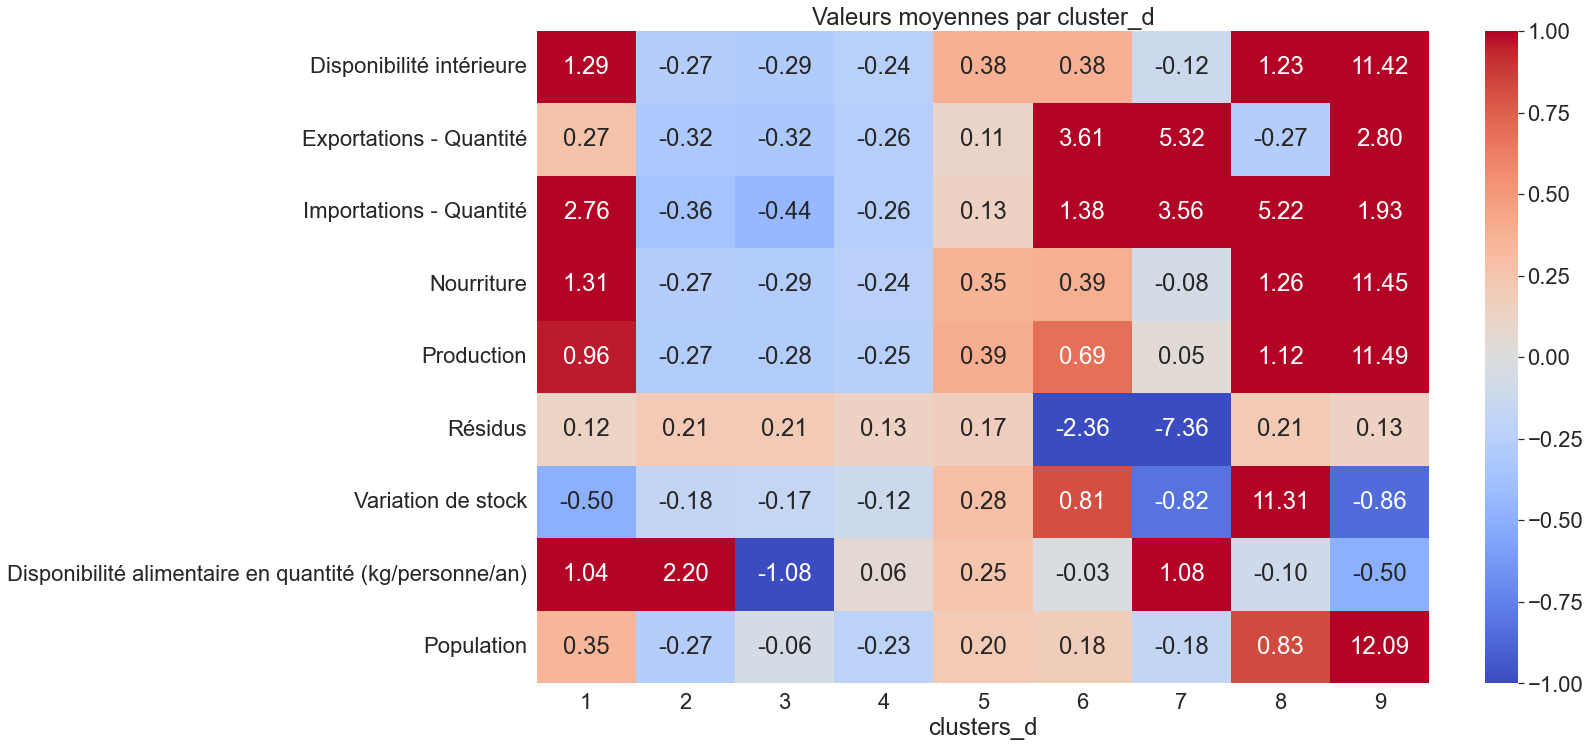

In [50]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(moyenne_d.T, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Valeurs moyennes par cluster_d')
plt.show()

Groupe 1 : Forte production, nourriture, importation, dispo alimentaire et intérieure.

Groupe 2 : Forte dispo alimentaire, faibles valeurs partout ailleurs. Principalement de petits pays ou des îles.

Groupe 3 : Faibles valeurs dans toutes les variables, ces pays ont besoin d'aide humanitaire.

Groupe 4 : Faibles valeurs dans toutes les variables, sauf dispo alimentaire.

Groupe 5 : Production, nourriture, dispo alimentaire et intérieure au dessus de la moyenne, mais faibles importations et exportations.

Groupes 6 et 7 : Résidus importants, forte importation et exportation.

Groupe 8 : Japon, fortes valeurs partout sauf en exportation.

Groupe 9 : Chine, fortes valeurs partout.

In [51]:
moyenne_k = data_k.groupby('clusters_k').mean()
moyenne_k

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population
clusters_k,,,,,,,,,
0,-0.032661,-0.051637,-0.209469,-0.030212,-0.012561,0.159343,0.016407,1.176960,-0.165480
1,-0.195613,-0.287095,-0.245882,-0.199327,-0.205318,0.171273,-0.106556,-0.596896,-0.074363
2,11.421549,2.801742,1.928445,11.446845,11.487729,0.132954,-0.857497,-0.501029,12.091705
3,1.322899,0.997161,2.992728,1.332533,1.073756,-0.292806,-0.113695,0.700458,0.430319
4,0.038386,4.621975,1.555146,0.068849,0.408359,-4.784576,0.149026,0.376282,-0.035728
5,1.233331,-0.268138,5.218809,1.260633,1.115468,0.207463,11.309120,-0.103540,0.825820


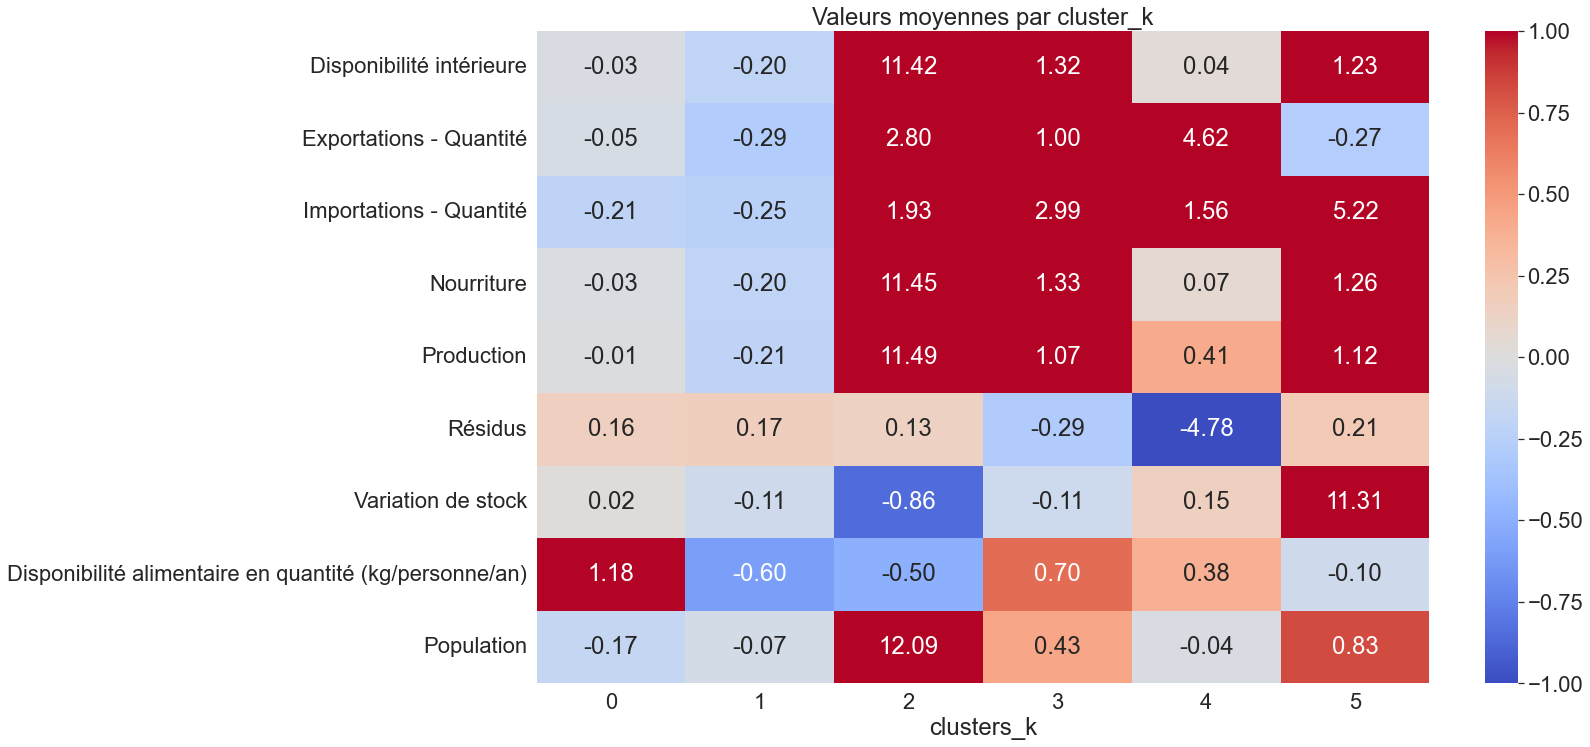

In [52]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(moyenne_k.T, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Valeurs moyennes par cluster_k')
plt.show()

Groupe 0 : Forte dispo alimentaire, valeurs moyennes partout ailleurs. Similaire au groupe 2 de l'autre classification.

Groupe 1 : Faibles valeurs dans toutes les variables, ces pays ont besoin d'aide humanitaire. Similaire au groupe 3 de l'autre classification.

Groupe 2 : Chine, fortes valeurs partout.

Groupe 3 : Fortes valeurs partout. Similaire au groupe 1 de l'autre classification.

Groupe 4 : Résidus importants, forte importation et exportation. Similaire aux groupes 6 et 7 de l'autre classification.

Groupe 5 : Japon, fortes valeurs partout sauf en exportation.

Les pays des groupes 4 et 5 de l'autre classification ont été dispatchés entre les groupes 0 et 1 de cette classification.

# VI) Stabilité politique <a class="anchor" id="vi"></a>
Je ne vais pas mener une analyse PESTEL de bout en bout, en revanche il me semble intéressant de regarder au moins la stabilité politique des prospects.

In [53]:
stab_pol = pd.read_csv('StabilitePolitique.csv')
stab_pol

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,-2.20,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,indice,-2.30,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,indice,-2.07,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,FS,Données de la sécurité alimentaire,181,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2016,2016,indice,-0.62,X,Ciffre de sources internationales,NaN
3904,FS,Données de la sécurité alimentaire,181,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.71,X,Ciffre de sources internationales,NaN
3905,FS,Données de la sécurité alimentaire,181,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,-0.72,X,Ciffre de sources internationales,NaN
3906,FS,Données de la sécurité alimentaire,181,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2019,2019,indice,-0.96,X,Ciffre de sources internationales,NaN


In [54]:
#Beaucoup de colonnes inutiles
stab_drop = stab_pol.drop(columns=['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'])
stab_drop

,Zone,Année,Valeur
0,Afghanistan,2000,-2.44
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.20
3,Afghanistan,2004,-2.30
4,Afghanistan,2005,-2.07
...,...,...,...
3903,Zimbabwe,2016,-0.62
3904,Zimbabwe,2017,-0.71
3905,Zimbabwe,2018,-0.72
3906,Zimbabwe,2019,-0.96


In [55]:
#On s'intéresse à 2017
stab_2017 = stab_drop.loc[stab_drop['Année'] == 2017].reset_index(drop=True)
#On peut ensuite drop la colonne année
stab_2017 = stab_2017.drop(columns='Année')
stab_2017

,Zone,Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.27
193,Viet Nam,0.23
194,Yémen,-2.94
195,Zambie,0.15


In [56]:
#Je décide de faire la jointure avec la classification du dendrogramme, car les clusters intéressants incluent un pays de plus
#Nécessaire, sinon la jointure ne fonctionne pas
data_d = data_d.reset_index()
data_d

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population,clusters_d
0,Afghanistan,-0.292379,-0.322376,-0.327347,-0.287558,-0.300432,0.207463,-0.188266,-1.196797,0.031457,3
1,Afrique du Sud,1.041161,0.019324,2.259081,1.042919,0.760683,0.207463,-0.188266,1.003890,0.211862,1
2,Albanie,-0.298849,-0.322376,-0.279352,-0.292933,-0.310144,0.207463,-0.134728,-0.241405,-0.259544,4
3,Algérie,-0.150031,-0.322376,-0.471334,-0.147119,-0.140520,0.207463,-0.188266,-0.884345,0.075815,3
4,Allemagne,0.795935,3.181409,4.008254,0.756665,0.661629,-2.623843,-0.576420,-0.041049,0.435249,6
...,...,...,...,...,...,...,...,...,...,...,...
162,Égypte,0.479535,-0.316952,0.104613,0.515432,0.405252,0.132954,-0.496112,-0.460443,0.555302,5
163,Émirats arabes unis,-0.062681,0.187463,1.827121,-0.047669,-0.287484,0.207463,-0.536266,1.505101,-0.202035,1
164,Équateur,-0.108621,-0.322376,-0.482000,-0.106801,-0.098438,0.207463,-0.201651,-0.051357,-0.138471,4
165,Éthiopie,-0.320201,-0.322376,-0.476667,-0.315108,-0.309496,0.207463,-0.188266,-1.286989,0.642025,3


In [57]:
#On fait une jointure à gauche, car on a pas besoin de la stabilité politique des pays pour lesquels on n'a pas d'autre data
stab_final = data_d.merge(stab_2017, how='left')
stab_final

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population,clusters_d,Valeur
0,Afghanistan,-0.292379,-0.322376,-0.327347,-0.287558,-0.300432,0.207463,-0.188266,-1.196797,0.031457,3,-2.80
1,Afrique du Sud,1.041161,0.019324,2.259081,1.042919,0.760683,0.207463,-0.188266,1.003890,0.211862,1,-0.28
2,Albanie,-0.298849,-0.322376,-0.279352,-0.292933,-0.310144,0.207463,-0.134728,-0.241405,-0.259544,4,0.38
3,Algérie,-0.150031,-0.322376,-0.471334,-0.147119,-0.140520,0.207463,-0.188266,-0.884345,0.075815,3,-0.92
4,Allemagne,0.795935,3.181409,4.008254,0.756665,0.661629,-2.623843,-0.576420,-0.041049,0.435249,6,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Égypte,0.479535,-0.316952,0.104613,0.515432,0.405252,0.132954,-0.496112,-0.460443,0.555302,5,-1.42
163,Émirats arabes unis,-0.062681,0.187463,1.827121,-0.047669,-0.287484,0.207463,-0.536266,1.505101,-0.202035,1,0.62
164,Équateur,-0.108621,-0.322376,-0.482000,-0.106801,-0.098438,0.207463,-0.201651,-0.051357,-0.138471,4,-0.07
165,Éthiopie,-0.320201,-0.322376,-0.476667,-0.315108,-0.309496,0.207463,-0.188266,-1.286989,0.642025,3,-1.68


In [58]:
#On appelle les clusters qui nous intéressent et on regarde la valeur de la stabilité politique
stab_cluster = stab_final.loc[stab_final['clusters_d'].isin([1, 6, 7, 8, 9])]
stab_cluster.sort_values('Valeur')

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Population,clusters_d,Valeur
96,Mexique,2.400582,-0.273562,4.701523,2.402290,1.784896,0.207463,-0.268574,0.799670,0.802083,1,-0.80
147,Thaïlande,0.240779,3.994981,-0.471334,0.277559,0.766510,-3.368924,-0.174882,-0.461087,0.318119,6,-0.75
7,Arabie saoudite,0.599236,-0.268138,3.368312,0.639744,0.080249,0.207463,-1.633805,1.498014,0.003631,1,-0.64
51,Fédération de Russie,2.618633,0.301363,0.723223,2.705343,2.558559,-0.314094,-0.201651,0.700458,0.982829,1,-0.64
1,Afrique du Sud,1.041161,0.019324,2.259081,1.042919,0.760683,0.207463,-0.188266,1.003890,0.211862,1,-0.28
50,France,0.688527,2.394956,2.216419,0.673342,0.814419,0.058446,2.261119,0.179921,0.280082,6,0.28
121,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1.116217,1.624774,3.672284,1.107427,0.855854,0.207463,-0.188266,0.762304,0.296499,1,0.39
16,Belgique,-0.230910,3.235647,1.320501,-0.227754,-0.018806,-1.655239,-0.268574,-0.480414,-0.185203,6,0.43
116,Pologne,0.418713,5.237035,-0.188693,0.448236,1.203516,-4.188512,2.823273,0.656651,0.045889,6,0.52
4,Allemagne,0.795935,3.181409,4.008254,0.756665,0.661629,-2.623843,-0.576420,-0.041049,0.435249,6,0.59


Pas de données de stabilité politique pour la Chine, j'ai vérifié elle n'est pas enregistrée sous un autre nom. Certains pays qui semblaient intéressants sont en fait plutôt mal noté dans ce secteur : Mexique, Thaïlande, Arabie saoudite, Russie et Afrique du Sud.

J'ai laissé la France pour qu'on voit un peu où on se situe, mais bien évidemment au delà de la comparaison, cette ligne est à ignorer.

Parmis les pays ayant une bonne stabilité politique, la Pologne est à la traîne en terme d'importations.
# Conclusion <a class="anchor" id="conclusion"></a>
Il semble que Japon, Pays-Bas, Hong-Kong, Emirats Arabes Unis, Allemagne, Belgique, Royaume-Unis (et peut-être Chine), soient les candidats les plus prometteurs.